In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
%pip install nltk
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install seaborn
%pip install tensorflow
%pip install keras
import nltk
nltk.download('popular')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you 

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | 

True

In [3]:
# Requirements installation
%pip install nltk pandas scikit-learn
%pip install keybert
!python -c "import nltk; nltk.download('punkt'); nltk.download('stopwords')"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
[nltk_data] Downloading package punkt to /home/maya/nltk_data...
[nltk_data] Downloading package punkt to /home/maya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/maya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/maya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text-Preprocessing and Feature Extraction 

In [4]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
class TextPreprocessor:
    def __init__(self, dictionary_path):
        self.stemmer = PorterStemmer()
        self.remove_punctuation_map = str.maketrans('', '', string.punctuation)
        self.dictionary = self.load_dictionary(dictionary_path)
        self.label_encoder = LabelEncoder()
        self.vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

    def load_dictionary(self, dictionary_path):
        with open(dictionary_path) as f:
            return set(f.read().splitlines())

    def preprocess_text(self, text):
        text = text.lower().translate(self.remove_punctuation_map)
        tokens = nltk.word_tokenize(text)
        filtered_tokens = [w for w in tokens if w not in stopwords.words('english')]
        stemmed_tokens = [self.stemmer.stem(word) for word in filtered_tokens]
        return stemmed_tokens

    def extract_ngrams(self, text, n=2):
        tokens = self.preprocess_text(text)
        ngrams = []
        for i in range(len(tokens)-n+1):
            ngram = ' '.join(tokens[i:i+n])
            if any(word in self.dictionary for word in tokens[i:i+n]):
                ngrams.append(ngram)
        return ngrams

    def preprocess_data(self, file_path):
        texts = pd.read_csv(file_path).dropna().reset_index(drop=True)
        
        # Process unigrams and bigrams
        processed_texts = []
        for text in texts['Text']:
            unigrams = self.preprocess_text(text)
            bigrams = self.extract_ngrams(text, n=2)
            processed_text = ' '.join(unigrams + bigrams)
            processed_texts.append(processed_text)
        
        # Filter using dictionary
        filtered_texts = [' '.join([word for word in text.split() 
                                  if any(dict_word in word for dict_word in self.dictionary)]) 
                         for text in processed_texts]
        
        # Transform labels
        labels = texts['Category'].tolist()
        y = self.label_encoder.fit_transform(labels)
        
        # Transform features
        X = self.vectorizer.fit_transform(filtered_texts)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        return X_train, X_val, y_train, y_val, y

    def decode_labels(self, encoded_labels):
        return self.label_encoder.inverse_transform(encoded_labels)

    def build_bigrams(self, text):
        tokens = self.preprocess_text(text)
        bigrams = list(nltk.bigrams(tokens))
        return [' '.join(bigram) for bigram in bigrams]

    def extract_keywords(self, text):
        tokens = self.preprocess_text(text)
        keywords = [word for word in tokens if word in self.dictionary]
        return keywords
# Example usage 
dictionary_path = '/home/maya/HW2-CSE 572/Document_classification/dictionary.txt'
file_path = '/home/maya/HW2-CSE 572/Document_classification/24_train_3.csv'
preprocessor = TextPreprocessor(dictionary_path)
X_train, X_val, y_train, y_val, encoded_labels = preprocessor.preprocess_data(file_path)

## Example use case to test bi gramns , keyword extractions and N-grams 

In [5]:
# bigrams 
text = "This is a sample album text for bigram extraction."
bigrams = preprocessor.build_bigrams(text)
print("Bigrams:", bigrams)
# keywords
keywords = preprocessor.extract_keywords(text)
print("Keywords:", keywords)

# N-grams
n=4
text = "This is a sample album text for n-gram extraction."
ngrams = preprocessor.extract_ngrams(text, n)
print(f"{n}-grams:", ngrams)

Bigrams: ['sampl album', 'album text', 'text bigram', 'bigram extract']
Keywords: ['album']
4-grams: ['sampl album text ngram', 'album text ngram extract']


In [6]:
encoded_labels

array([3, 0, 3, 3, 0, 4, 0, 1, 0, 3, 3, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 3,
       4, 0, 0, 2, 2, 3, 3, 3, 4, 2, 1, 0, 1, 1, 2, 1, 2, 1, 3, 3, 4, 3,
       0, 0, 2, 0, 2, 2, 0, 3, 2, 1, 0, 4, 3, 2, 0, 2, 4, 1, 3, 1, 2, 4,
       3, 4, 2, 1, 3, 3, 3, 4, 3, 4, 4, 2, 4, 4, 2, 2, 0, 0, 0, 3, 4, 0,
       2, 1, 0, 1, 4, 3, 1, 2, 3, 4, 0, 0, 4, 4, 2, 0, 1, 4, 1, 4, 0, 4,
       1, 3, 0, 0, 4, 4, 3, 1, 3, 1, 3, 4, 0, 0, 2, 4, 1, 4, 4, 1, 0, 0,
       0, 4, 2, 3, 0, 4, 0, 2, 4, 3, 0, 0, 2, 4, 1, 3, 3, 3, 2, 0, 2, 1,
       2, 4, 4, 0, 3, 3, 1, 3, 3, 1, 4, 3, 1, 2, 0, 2, 4, 4, 0, 1, 2, 2,
       4, 4, 3, 0, 3, 0, 3, 2, 3, 2, 0, 4, 2, 4, 0, 1, 0, 0, 0, 4, 3, 4,
       3, 3, 1, 4, 4, 0, 0, 0, 1, 0, 4, 4, 4, 4, 0, 0, 2, 0, 3, 1, 3, 4,
       0, 0, 0, 3, 3, 0, 0, 0, 3, 4, 4, 3, 4, 0, 1, 1, 2, 2, 3, 3, 0, 1,
       4, 3, 2, 4, 0, 4, 1, 0, 2, 0, 3, 3, 3, 2, 0, 4, 3, 0, 0, 0, 3, 2,
       2, 4, 4, 4, 3, 0, 2, 0, 4, 2, 2, 0, 1, 4, 4, 4, 0, 3, 2, 3, 0, 1,
       3, 1, 4, 3, 1, 0, 4, 0, 2, 1, 2, 1, 3, 3, 1,

## 1. a) Running Neural Network , and extracting the features by countvectorizer(), and 5-fold cross validation

In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import gensim.downloader as api

# Download nltk resources if not already available
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing class (as provided)
class TextPreprocessor:
    def __init__(self, dictionary_path):
        self.stemmer = PorterStemmer()
        self.remove_punctuation_map = str.maketrans('', '', string.punctuation)
        self.dictionary = self.load_dictionary(dictionary_path)
        self.label_encoder = LabelEncoder()
        self.vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

    def load_dictionary(self, dictionary_path):
        with open(dictionary_path) as f:
            return set(f.read().splitlines())

    def preprocess_text(self, text):
        text = text.lower().translate(self.remove_punctuation_map)
        tokens = nltk.word_tokenize(text)
        filtered_tokens = [w for w in tokens if w not in stopwords.words('english')]
        stemmed_tokens = [self.stemmer.stem(word) for word in filtered_tokens]
        return stemmed_tokens

    def extract_ngrams(self, text, n=2):
        tokens = self.preprocess_text(text)
        ngrams = []
        for i in range(len(tokens)-n+1):
            ngram = ' '.join(tokens[i:i+n])
            if any(word in self.dictionary for word in tokens[i:i+n]):
                ngrams.append(ngram)
        return ngrams

    def preprocess_data(self, file_path):
        texts_df = pd.read_csv(file_path).dropna().reset_index(drop=True)
        texts = texts_df['Text'].tolist()
        
        # Process texts: combine unigrams and bigrams
        processed_texts = []
        for text in texts:
            unigrams = self.preprocess_text(text)
            bigrams = self.extract_ngrams(text, n=2)
            processed_text = ' '.join(unigrams + bigrams)
            processed_texts.append(processed_text)
        
        # Optional filtering using dictionary: keep words that match any dict word
        filtered_texts = [' '.join([word for word in text.split() 
                                    if any(dict_word in word for dict_word in self.dictionary)]) 
                          for text in processed_texts]
        
        # Transform labels
        labels = texts_df['Category'].tolist()
        y = self.label_encoder.fit_transform(labels)
        
        # Transform features using TF-IDF
        X_tfidf = self.vectorizer.fit_transform(filtered_texts)
        return texts, filtered_texts, X_tfidf, y

    def decode_labels(self, encoded_labels):
        return self.label_encoder.inverse_transform(encoded_labels)

# File paths (update these to your actual file locations)
dictionary_path = '/home/maya/HW2-CSE 572/Document_classification/dictionary.txt'
file_path = '/home/maya/HW2-CSE 572/Document_classification/24_train_3.csv'

# Instantiate the preprocessor and load data
preprocessor = TextPreprocessor(dictionary_path)
raw_texts, processed_texts, X_tfidf, y = preprocessor.preprocess_data(file_path)

# Build additional feature matrices

# 1. TF-IDF features (already computed)
X_tfidf_dense = X_tfidf.toarray()

# 2. CountVectorizer features
count_vectorizer = CountVectorizer(max_features=5000)
X_count_dense = count_vectorizer.fit_transform(processed_texts).toarray()

# 3. GloVe features (averaging word embeddings)
glove_model = api.load("glove-wiki-gigaword-100")
def get_glove_embedding(text):
    tokens = preprocessor.preprocess_text(text)
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    if len(vectors) == 0:
        return np.zeros(glove_model.vector_size)
    return np.mean(vectors, axis=0)
X_glove = np.array([get_glove_embedding(text) for text in raw_texts])

# 4. Word2Vec features (averaging word embeddings)
word2vec_model = api.load("word2vec-google-news-300")
def get_word2vec_embedding(text):
    tokens = preprocessor.preprocess_text(text)
    vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
    if len(vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(vectors, axis=0)
X_word2vec = np.array([get_word2vec_embedding(text) for text in raw_texts])



# Determine number of classes
num_classes = len(np.unique(y))




2025-03-25 12:10:13.675788: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-25 12:10:17.056643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742929817.830677   22330 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742929818.011560   22330 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742929819.986903   22330 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 


=== Evaluating TFIDF features ===


2025-03-25 12:17:59.767414: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


TFIDF -> Training Accuracy: 1.0000, Validation Accuracy: 0.9800, Test Accuracy: 0.9650

=== Evaluating CountVectorizer features ===
CountVectorizer -> Training Accuracy: 1.0000, Validation Accuracy: 0.9550, Test Accuracy: 0.9400

=== Evaluating GloVe features ===
CountVectorizer -> Training Accuracy: 1.0000, Validation Accuracy: 0.9550, Test Accuracy: 0.9400

=== Evaluating GloVe features ===
GloVe -> Training Accuracy: 0.9700, Validation Accuracy: 0.9400, Test Accuracy: 0.9250

=== Evaluating Word2Vec features ===
GloVe -> Training Accuracy: 0.9700, Validation Accuracy: 0.9400, Test Accuracy: 0.9250

=== Evaluating Word2Vec features ===
Word2Vec -> Training Accuracy: 0.9700, Validation Accuracy: 0.9500, Test Accuracy: 0.9200

Final Results:
 Feature Method  Training Accuracy  Validation Accuracy  Testing Accuracy
          TFIDF               1.00                0.980             0.965
CountVectorizer               1.00                0.955             0.940
          GloVe           

### 1 A) Build the neural network model

In [36]:
def build_model(input_dim,learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


### 1 b) Feature exploration. Use other features like TFIDF, or any word embeddings provided by other packages like GloVe with gensim, or BERT. Use 5-fold cross-validation to evaluate the performance of your Neural Network

In [ ]:
# evaluate the model on k-fold cross validation and then save the results in the dataframe with the mean of all the folds 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

n_samples = len(y)
indices = np.arange(n_samples)
# First, split off the test set (20% of the data)
train_val_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
# Then, split train/validation from the remaining 80% (e.g., 20% of train_val for validation)
train_idx, val_idx = train_test_split(train_val_idx, test_size=0.25, random_state=42)  # 0.25*0.8=0.2 overall

# Collect feature sets in a dictionary
feature_sets = {
    'TFIDF': X_tfidf_dense,
    'CountVectorizer': X_count_dense,
    'GloVe': X_glove,
    'Word2Vec': X_word2vec
}

# Initialize the KFold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store results
kfold_results = []

# Loop over each feature set
for feat_name, X_features in feature_sets.items():
    fold_train_accuracies = []
    fold_val_accuracies = []
    print(f"\nTraining with {feat_name} features:")
    
    # Loop over each fold
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_features, y), 1):
        X_train, X_val = X_features[train_idx], X_features[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Build and train the model
        model = build_model(X_features.shape[1])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        
        # Evaluate on training set
        train_preds = model.predict(X_train)
        train_preds_classes = np.argmax(train_preds, axis=1)
        train_accuracy = accuracy_score(y_train, train_preds_classes)
        
        # Evaluate on validation set
        val_preds = model.predict(X_val)
        val_preds_classes = np.argmax(val_preds, axis=1)
        val_accuracy = accuracy_score(y_val, val_preds_classes)
        
        fold_train_accuracies.append(train_accuracy)
        fold_val_accuracies.append(val_accuracy)
        
        print(f"Fold {fold}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    
    # Calculate mean accuracies
    mean_train_accuracy = np.mean(fold_train_accuracies)
    mean_val_accuracy = np.mean(fold_val_accuracies)
    
    print(f"\n{feat_name} Mean Results:")
    print(f"Mean Training Accuracy: {mean_train_accuracy:.4f}")
    print(f"Mean Validation Accuracy: {mean_val_accuracy:.4f}")
    
    # Save the model
    model.save(f"{feat_name}_model.h5")
    
    kfold_results.append({
        'Feature Method': feat_name,
        'Mean Training Accuracy': mean_train_accuracy,
        'Mean Validation Accuracy': mean_val_accuracy
    })

# Create a DataFrame to present the k-fold results
kfold_results_df = pd.DataFrame(kfold_results)
print("\nFinal K-Fold Results:")
print(kfold_results_df.to_string(index=False))

# Save the results to CSV files
kfold_results_df.to_csv('kfold_results.csv', index=False)

### 1. C) Describe how you generate features.

### Feature Generation Process

1. **TF-IDF Features**
    - Tokenized and preprocessed text using NLTK
    - Removed punctuation and stopwords
    - Applied Porter stemming
    - Generated unigrams and bigrams 
    - Created TF-IDF matrix with max 5000 features

2. **CountVectorizer Features**
    - Used same preprocessing as TF-IDF
    - Generated bag-of-words representation
    - Limited to max 5000 features
    - Captured raw term frequencies

3. **GloVe Word Embeddings**
    - Used pre-trained GloVe embeddings (100 dimensions)
    - Averaged word vectors for each document
    - Handled unknown words by using zero vectors

4. **Word2Vec Features** 
    - Used pre-trained Word2Vec model (300 dimensions)
    - Computed document embeddings by averaging word vectors
    - Provided dense semantic representations

Each feature extraction method was used separately to train the neural network model.


### 1.d) Organinsing results in a Table  

In [8]:
# save the results to a CSV file
results_df.to_csv('feature_extraction_results.csv', index=False)

### 1. e) Draw a bar figure showing the training and validation result, x-axis should be the parameter values, y-axis should be the training and validation accuracy.

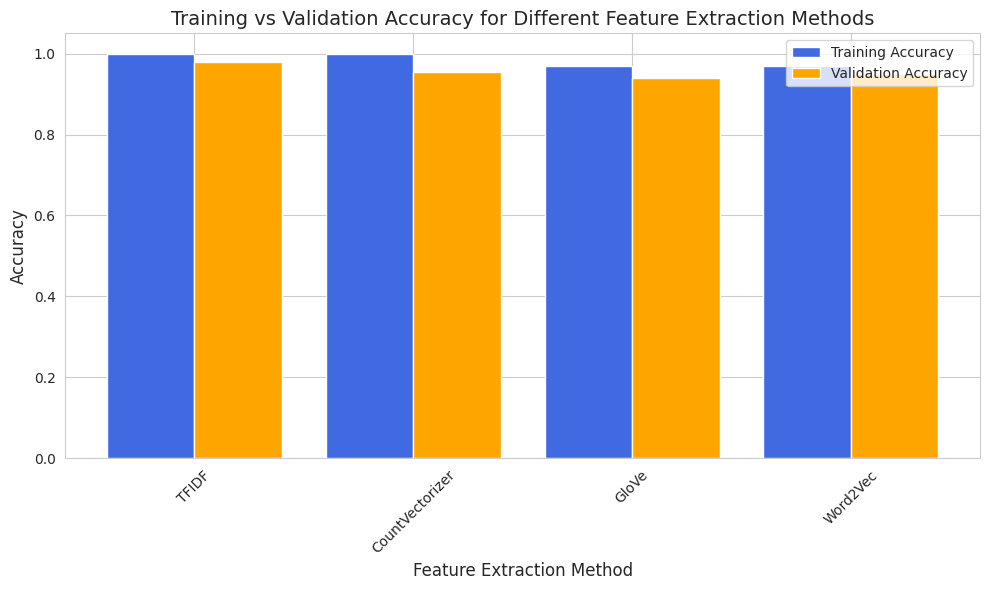

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Define feature extraction methods and their corresponding accuracies
feature_methods = results_df["Feature Method"]
training_accuracies = results_df["Training Accuracy"]
validation_accuracies = results_df["Validation Accuracy"]

# Define width for bar positions
bar_width = 0.4
x = range(len(feature_methods))

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, training_accuracies, width=bar_width, label="Training Accuracy", color="royalblue")
plt.bar([i + bar_width for i in x], validation_accuracies, width=bar_width, label="Validation Accuracy", color="orange")

# Add labels
plt.xlabel("Feature Extraction Method", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Validation Accuracy for Different Feature Extraction Methods", fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], feature_methods, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### 2. A)Describe your parameter setting. 
#### Parameters for the neural net 
* input- Vectors from the TF-IDF, CountVectorizer, GloVe, and Word2Vec
* Learning_Rate- 0.001
* Hidden layers- 2 
* Neurons per hidden layer- 128 and 64 respectively
* Activation fucntion- ReLu
* A softmax layer
* Optimizer- Adam
* Loss- Cross entropical loss function



### 2.B) Use 5-fold cross-validation to evaluate the performance w.r.t. the learning rates (), you could use the feature engineering method that has the best performance 

#### 1) Report the average training and validation accuracy, and their standard deviation for different parameter values 

In [23]:
# do 5-fold validation wrt learning rates [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
# then save the results in the dataframe with the mean of all the folds
learning_rates = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
#load model

# Initialize a list to store results
lr_results = []
# Loop over each learning rate
for lr in learning_rates:
    fold_train_accuracies = []
    fold_val_accuracies = []
    print(f"\nTraining with learning rate: {lr}")
    
    # Loop over each fold
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_tfidf_dense, y), 1):
        X_train, X_val = X_tfidf_dense[train_idx], X_tfidf_dense[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Build and train the model
        model = build_model(X_tfidf_dense.shape[1], learning_rate=lr)
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        
        # Evaluate on training set
        train_preds = model.predict(X_train)
        train_preds_classes = np.argmax(train_preds, axis=1)
        train_accuracy = accuracy_score(y_train, train_preds_classes)
        
        # Evaluate on validation set
        val_preds = model.predict(X_val)
        val_preds_classes = np.argmax(val_preds, axis=1)
        val_accuracy = accuracy_score(y_val, val_preds_classes)
        
        fold_train_accuracies.append(train_accuracy)
        fold_val_accuracies.append(val_accuracy)
        
        print(f"Fold {fold}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    
    # Calculate mean accuracies
    mean_train_accuracy = np.mean(fold_train_accuracies)
    mean_val_accuracy = np.mean(fold_val_accuracies)
    
    print(f"\nLearning Rate {lr} Mean Results:")
    print(f"Mean Training Accuracy: {mean_train_accuracy:.4f}")
    print(f"Mean Validation Accuracy: {mean_val_accuracy:.4f}")
    
    lr_results.append({
        'Learning Rate': lr,
        'Mean Training Accuracy': mean_train_accuracy,
        'Mean Validation Accuracy': mean_val_accuracy
    })
# Create a DataFrame to present the k-fold results
lr_results_df = pd.DataFrame(lr_results)
print("\nFinal Learning Rate Results:")
print(lr_results_df.to_string(index=False))
# Save the results to CSV files
lr_results_df.to_csv('lr_results.csv', index=False)


Training with learning rate: 0.0001
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 1: Training Accuracy = 0.9888, Validation Accuracy = 0.9350
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Fold 2: Training Accuracy = 0.9900, Validation Accuracy = 0.9600
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 3: Training Accuracy = 0.9862, Validation Accuracy = 0.9450
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 4: Training Accuracy = 0.9850, Validation Accuracy = 0.9800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 5: Training Accuracy = 0.9862, Validation Accuracy = 0.9350

Learning Rate 0.0001 Mean Results:
Mean Training Accuracy: 0.9872
Mean Validation Accuracy: 0.9510

Training with learning rate: 0.0003
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 1: Training Accuracy = 1.0000, Val

### 2. B) 2 Draw a line figure showing the training and validation result, x-axis should be the parameter values, y-axis should be the training and validation accuracy. 

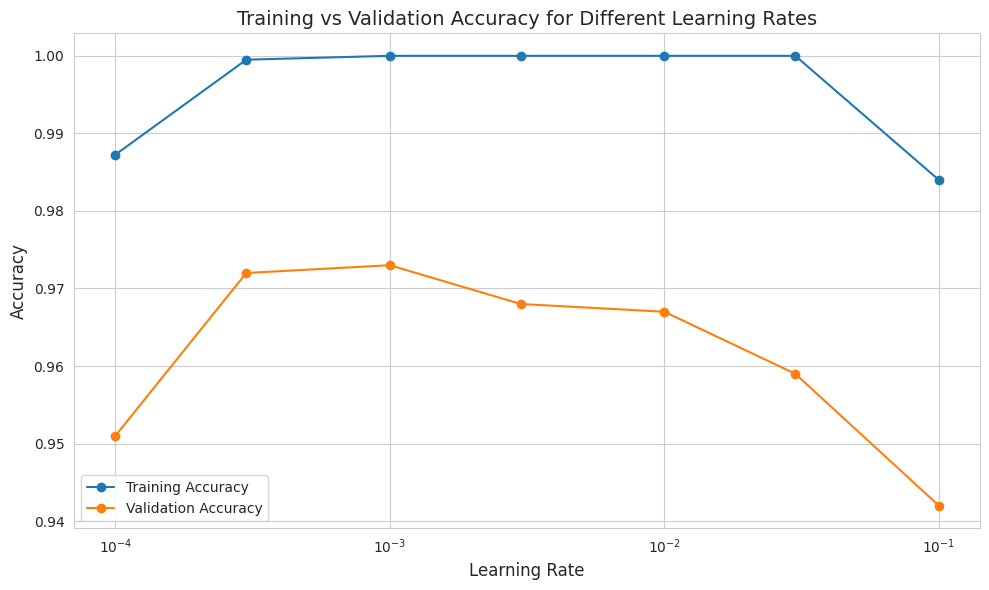

In [24]:
# plot the training and validation accuracies for different learning rates
plt.figure(figsize=(10, 6))
plt.plot(lr_results_df['Learning Rate'], lr_results_df['Mean Training Accuracy'], marker='o', label='Training Accuracy')
plt.plot(lr_results_df['Learning Rate'], lr_results_df['Mean Validation Accuracy'], marker='o', label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy for Different Learning Rates', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('learning_rate_accuracy.png')
plt.show()
# Save the final model with the best learning rate
best_lr = lr_results_df.loc[lr_results_df['Mean Validation Accuracy'].idxmax()]['Learning Rate']
best_model = build_model(X_tfidf_dense.shape[1], learning_rate=best_lr)
best_model.fit(X_tfidf_dense, y, epochs=10, batch_size=32, verbose=0)
# Save the final model
best_model.save(f"final_model_best_lr_{best_lr}.h5")

### 2. C)Use 5-fold cross-validation to evaluate the performance w.r.t. optimizers, you could use the feature engineering method that has the best performance

In [ ]:
# now do 5 fold validation based on differetnt optimizers like [Adam , SGD , RMSprop, Adagrad]
# will use the TFIDFmodel and the learning rate that gave the best results
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad']
# Initialize a list to store results
opt_results = []
# Loop over each optimizer
for opt in optimizers:
    fold_train_accuracies = []
    fold_val_accuracies = []
    print(f"\nTraining with optimizer: {opt}")
    
    # Loop over each fold
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_tfidf_dense, y), 1):
        X_train, X_val = X_tfidf_dense[train_idx], X_tfidf_dense[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Build and train the model
        model = build_model(X_tfidf_dense.shape[1], learning_rate=best_lr)
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        
        # Evaluate on training set
        train_preds = model.predict(X_train)
        train_preds_classes = np.argmax(train_preds, axis=1)
        train_accuracy = accuracy_score(y_train, train_preds_classes)
        
        # Evaluate on validation set
        val_preds = model.predict(X_val)
        val_preds_classes = np.argmax(val_preds, axis=1)
        val_accuracy = accuracy_score(y_val, val_preds_classes)
        
        fold_train_accuracies.append(train_accuracy)
        fold_val_accuracies.append(val_accuracy)
        
        print(f"Fold {fold}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    
    # Calculate mean accuracies
    mean_train_accuracy = np.mean(fold_train_accuracies)
    mean_val_accuracy = np.mean(fold_val_accuracies)
    # calculate the mean stadard deviation of the training and validation accuracies
    std_train_accuracy = np.std(fold_train_accuracies)
    std_val_accuracy = np.std(fold_val_accuracies)
    
    print(f"\nOptimizer {opt} Mean Results:")
    print(f"Mean Training Accuracy: {mean_train_accuracy:.4f}")
    print(f"Mean Validation Accuracy: {mean_val_accuracy:.4f}")
    
    opt_results.append({
        'Optimizer': opt,
        'Mean Training Accuracy': mean_train_accuracy,
        'Mean Validation Accuracy': mean_val_accuracy,
        'Std Training Accuracy': std_train_accuracy,
        'Std Validation Accuracy': std_val_accuracy
    })
# Create a DataFrame to present the k-fold results
opt_results_df = pd.DataFrame(opt_results)
print("\nFinal Optimizer Results:")
print(opt_results_df.to_string(index=False))
# Save the results to CSV files
opt_results_df.to_csv('opt_results.csv', index=False)



Training with optimizer: adam
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 1: Training Accuracy = 1.0000, Validation Accuracy = 0.9650
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 2: Training Accuracy = 1.0000, Validation Accuracy = 0.9750
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 3: Training Accuracy = 1.0000, Validation Accuracy = 0.9650
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 4: Training Accuracy = 1.0000, Validation Accuracy = 0.9750
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 5: Training Accuracy = 1.0000, Validation Accuracy = 0.9650

Optimizer adam Mean Results:
Mean Training Accuracy: 1.0000
Mean Validation Accuracy: 0.9690

Training with optimizer: sgd
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 1: Training Accuracy = 0.2500, Validation Accuracy = 

### 2. C) 1 Report the average training and validation accuracy, and their standard deviation for different parameter values

### 2. C,2) Draw a bar figure showing the training and validation result, x-axis should be the parameter values, y-axis shodenseuld be the training and validation accuracy. (5pt)

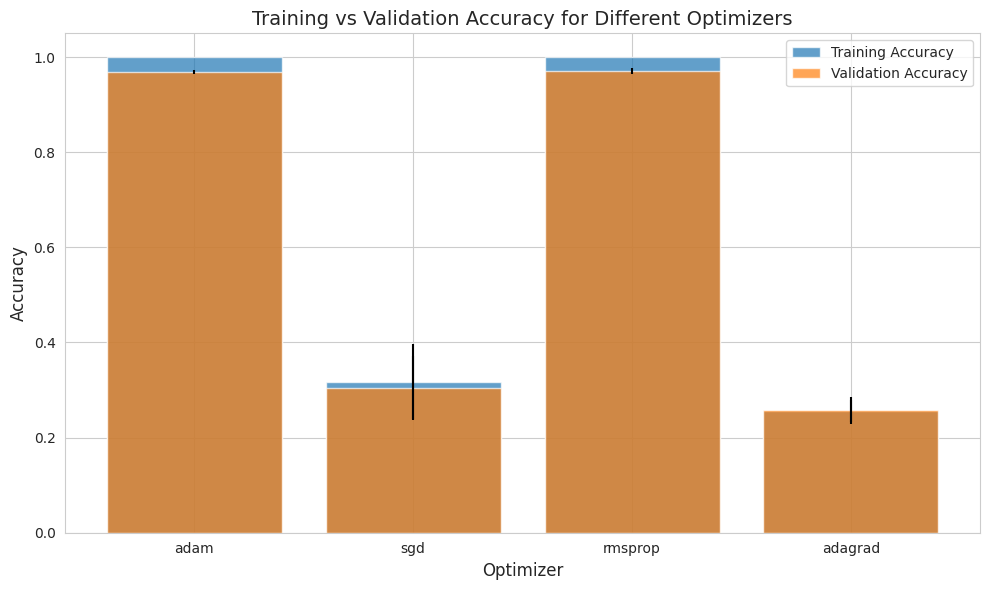

In [28]:
# plot the bar plot for the training and validation accuracies for different optimizers
plt.figure(figsize=(10, 6))
plt.bar(opt_results_df['Optimizer'], opt_results_df['Mean Training Accuracy'], yerr=opt_results_df['Std Training Accuracy'], label='Training Accuracy', alpha=0.7)
plt.bar(opt_results_df['Optimizer'], opt_results_df['Mean Validation Accuracy'], yerr=opt_results_df['Std Validation Accuracy'], label='Validation Accuracy', alpha=0.7)
plt.xlabel('Optimizer', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy for Different Optimizers', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('optimizer_accuracy.png')
plt.show()

#### saving the model with best optimizer in this case we have rmsprop

In [29]:
#save the model with best optimizer
best_opt = opt_results_df.loc[opt_results_df['Mean Validation Accuracy'].idxmax()]['Optimizer']
best_model = build_model(X_tfidf_dense.shape[1], learning_rate=best_lr)
best_model.compile(optimizer=best_opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
best_model.fit(X_tfidf_dense, y, epochs=10, batch_size=32, verbose=0)
# Save the final model
best_model.save(f"final_model_best_opt_{best_opt}.h5")

### 3 Predict the labels for the testing data (using raw training data and raw testing data).

In [33]:
# Load and preprocess test data
test_file_path = '/home/maya/HW2-CSE 572/Document_classification/testing_data/news-test-1 - news-test.csv'
test_df = pd.read_csv(test_file_path)

# Process test texts using the same preprocessing logic
processed_test_texts = []
for text in test_df['Text']:
    unigrams = preprocessor.preprocess_text(text)
    bigrams = preprocessor.extract_ngrams(text, n=2)
    processed_text = ' '.join(unigrams + bigrams)
    processed_test_texts.append(processed_text)

# Filter using dictionary
filtered_test_texts = [' '.join([word for word in text.split() 
                              if any(dict_word in word for dict_word in preprocessor.dictionary)]) 
                     for text in processed_test_texts]

# Transform features using the same vectorizer
X_test = preprocessor.vectorizer.transform(filtered_test_texts)
X_test_dense = X_test.toarray()

# Make predictions using the best model
predictions = best_model.predict(X_test_dense)
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predicted labels
decoded_predictions = preprocessor.decode_labels(predicted_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [35]:
# Create output dataframe using Article_ID from test data
output_df = pd.DataFrame({
    'Article_ID': test_df['ArticleId'],  # Use Article_ID from test data
    'Predicted_Label': decoded_predictions
})

# Save predictions to CSV without headers
output_df.to_csv('predictions.csv', header=False, index=False)